# Libraries and Data Information

In [22]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

### The data set includes information about:

- This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. 

- The dataset has been taken from Canada Government official open data website. This is a compiled version.

- This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

### Feature Information

**Make:** Vehicle brand

**Model:** Vehicle model
- 4WD/4X4 = Four-wheel drive

- AWD = All-wheel drive

- FFV = Flexible-fuel vehicle

- SWB = Short wheelbase

- LWB = Long wheelbase

- EWB = Extended wheelbase


**Vehicle Class:** Vehicle class (e.g. small car, sports car, van, etc.)

**Engine Size (L):** Vehicle engine displacement (in liters)

**Cylinders:** Number of vehicle cylinders

**Transmission:** Vehicle gearbox type (manual or automatic)
- A = Automatic

- AM = Automated manual

- AS = Automatic with select shift

- AV = Continuously variable

- M = Manual

- 3 - 10 = Number of gears

**Fuel Type:** Type of fuel used (e.g. gasoline, diesel, hybrid, etc.)
- X = Regular gasoline

- Z = Premium gasoline

- D = Diesel

- E = Ethanol (E85)

- N = Natural gas

**Fuel Consumption City (L/100 km):** Fuel consumption city (liters/100 km)

**Fuel Consumption Hwy (L/100 km):** Hwy fuel consumption (liters/100 km)

**Fuel Consumption Comb (L/100 km):** Average fuel consumption (liters/100 km)

**Fuel Consumption Comb (mpg):** Fuel economy (miles per gallon)
- City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per gallon (mpg)

**CO2 Emissions (g/km):** CO2 emissions per vehicle (grams/kilometer)

# Read and Check Data

In [23]:
co2 = pd.read_csv("co2.csv")
df = co2.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
# information about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [25]:
# let's edit column names
renamed_columns = {
    'Make' : "make",
    'Model' : "model",
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Cylinders': "cylinders",
    'Transmission' : "transmission",
    'Fuel Type': 'fuel_type',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'Fuel Consumption Comb (mpg)': 'mpgfuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_columns, axis='columns', inplace=True)

In [5]:
# let's check our missing values
df.isnull().sum()

make                 0
model                0
vehicle_class        0
engine_size          0
cylinders            0
transmission         0
fuel_type            0
fuel_cons_city       0
fuel_cons_hwy        0
fuel_cons_comb       0
mpgfuel_cons_comb    0
co2                  0
dtype: int64

In [6]:
# describe basic statistics of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
mpgfuel_cons_comb,7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [7]:
# Let's observe our data in a table 

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

In [8]:
get_unique_values(df)

,Column Name,Number of Unique Values,Unique Values,Data Type
0,make,42,-,object
1,model,2053,-,object
2,vehicle_class,16,-,object
3,engine_size,51,-,float64
4,cylinders,8,"[4, 6, 12, 8, 10, 3, 5, 16]",int64
5,transmission,27,-,object
6,fuel_type,5,"[Z, D, X, E, N]",object
7,fuel_cons_city,211,-,float64
8,fuel_cons_hwy,143,-,float64
9,fuel_cons_comb,181,-,float64


- The columns Engine Size(L), Cylinders, Fuel Consumption City (L/100 km), Fuel Consumption Hwy (L/100 km), Fuel Consumption Comb (L/100 km), Fuel Consumption Comb (mpg) and CO2 Emissions(g/km) are numerical and continuous in nature.
- The columns Make, Model, Vehicle Class, Transmission and Fuel Type are categorical in nature.

In [9]:
# Duplicated data

df_duplicated = df[df.duplicated() == True]
df_duplicated.shape

(1103, 12)

* There are duplicate rows in the data set. However, since I will be using a linear model, I do not plan to delete these rows because duplicate rows contain similar values. Linear regression tries to find the general trend of the data points and the fact that duplicate rows contain similar values does not lead to a major change in the model's predictions.

# Categorical Features

* Let's look at the distribution of our categorical characteristics with a bar graph

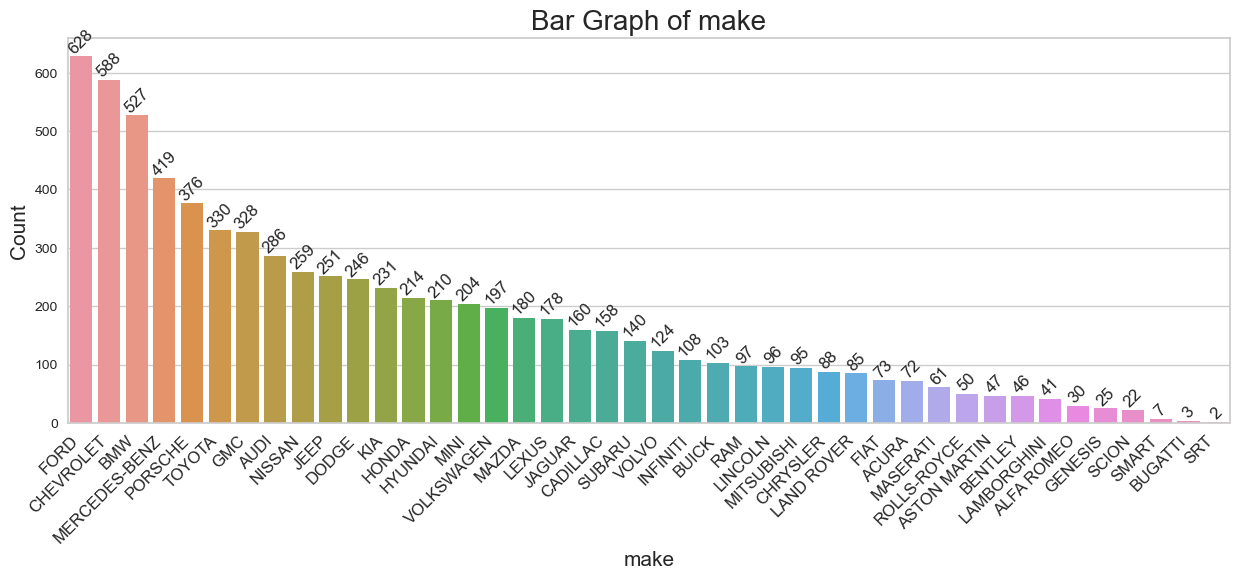

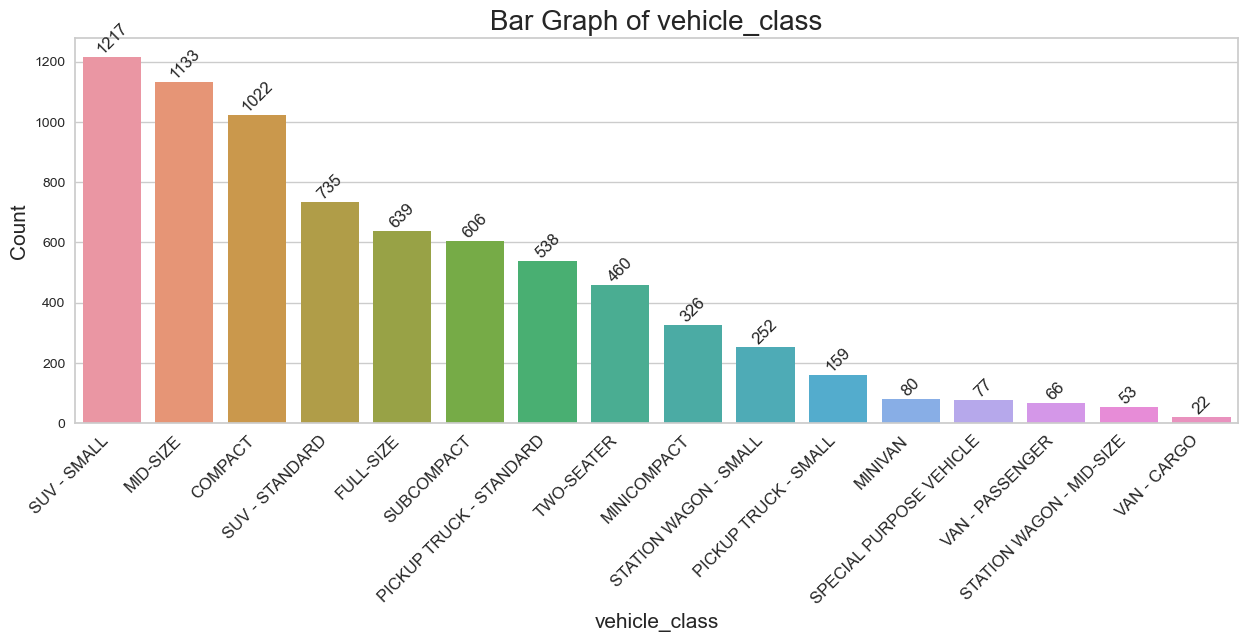

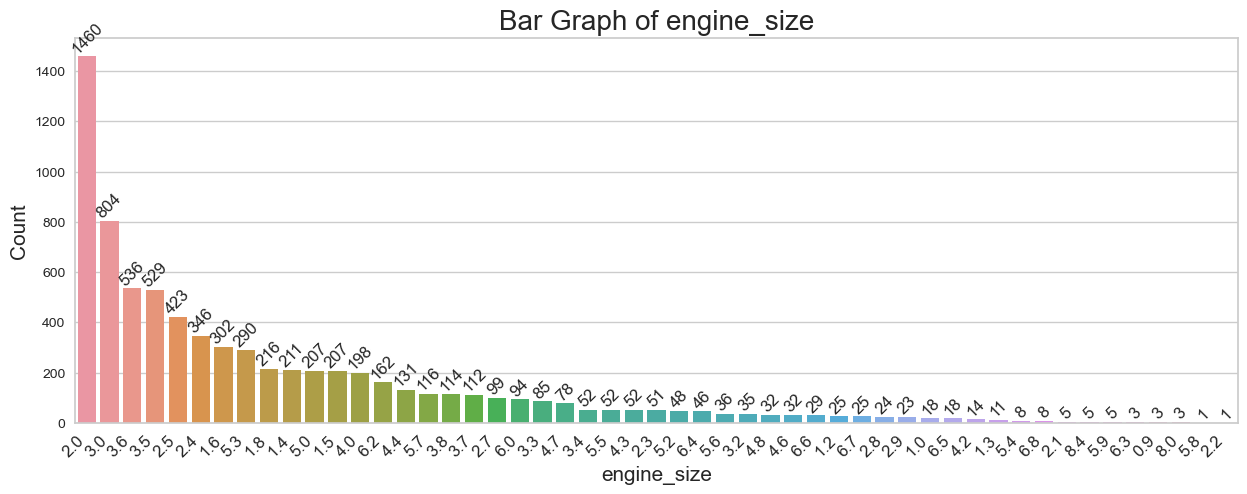

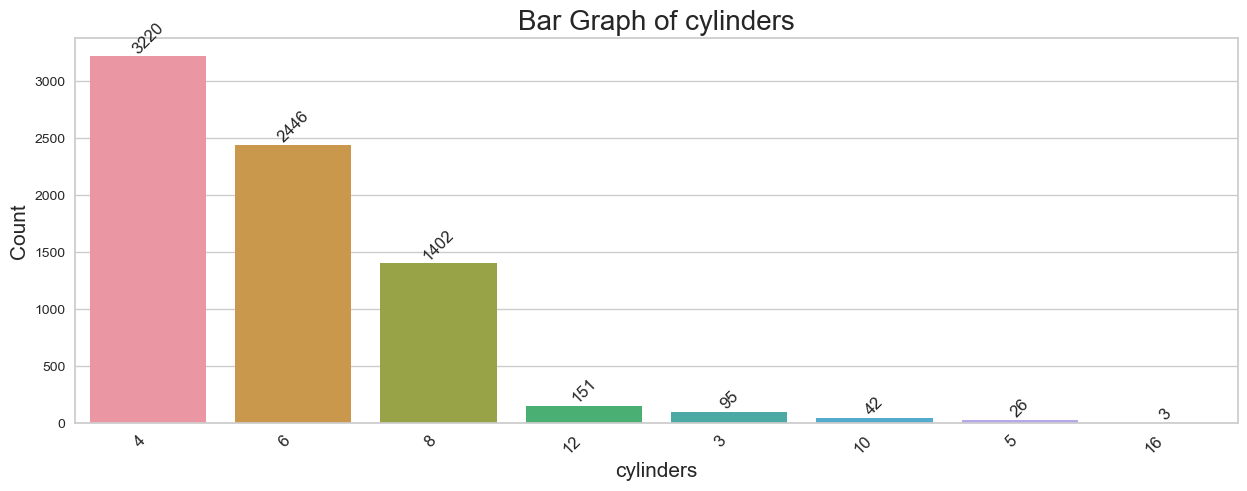

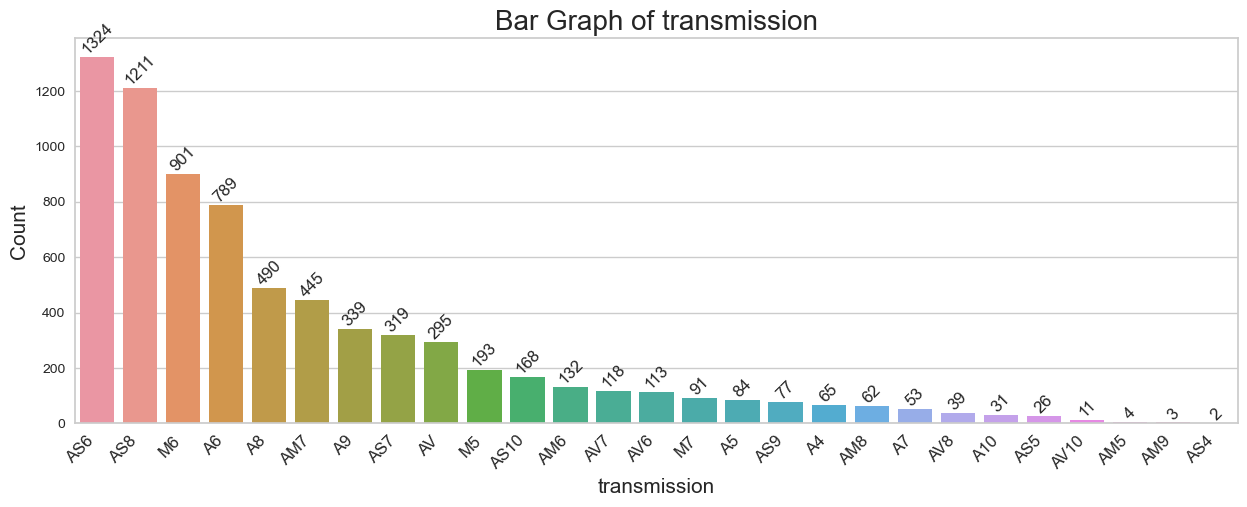

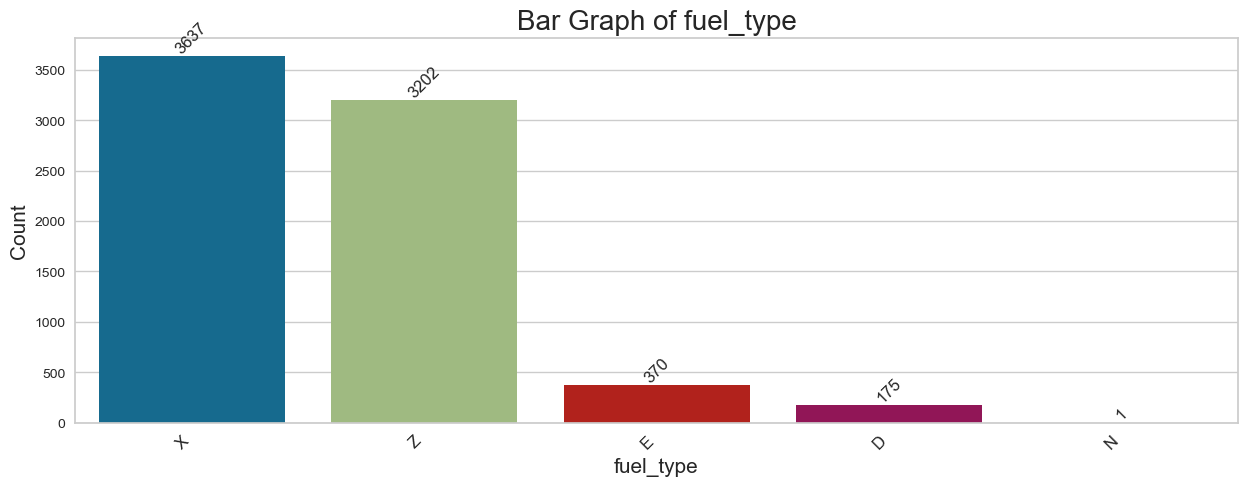

In [10]:
def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        ax = sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Bar Graph of {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
cat_features = ['make', 'vehicle_class', 'engine_size', 'cylinders', 'transmission', 'fuel_type']

plot_bar_graphs(df, cat_features)

As can be seen from the graphs above:

* The number of vehicles consuming diesel, ethanol and natural gas fuel in the data set is very small.
* Widespread use of AS6, AS8, M6, A6, A9 as transmission options
* 4, 6, 8 are commonly used as cylinders option
* Engine Size (L) with 2.0 and 3.0 options in density
* The dataset is generally dominated by smaller sized vehicles

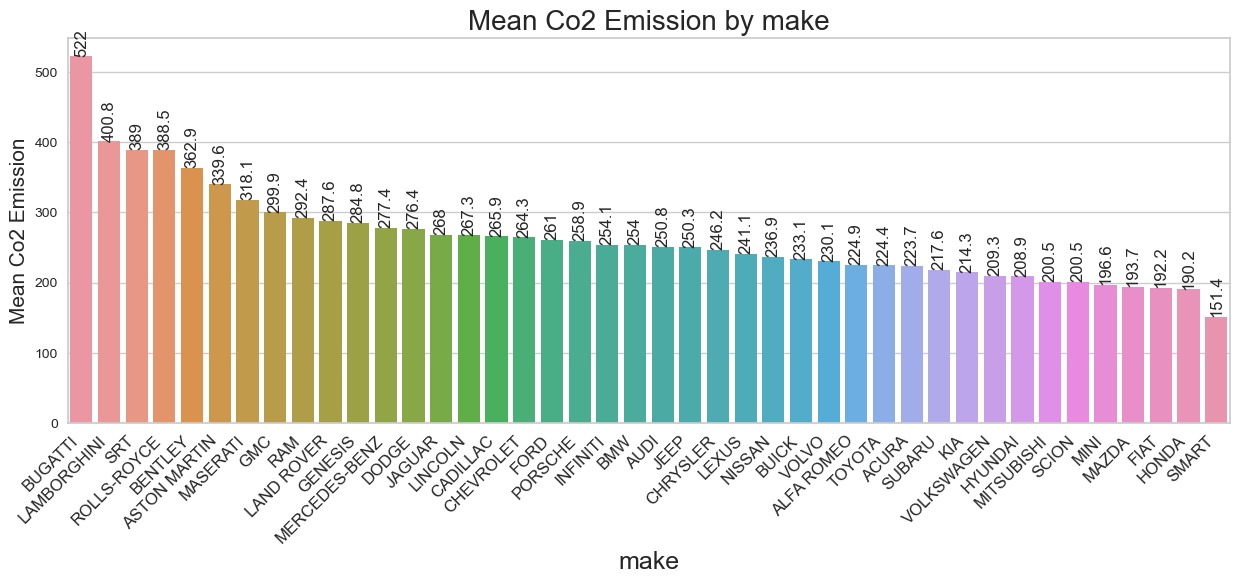

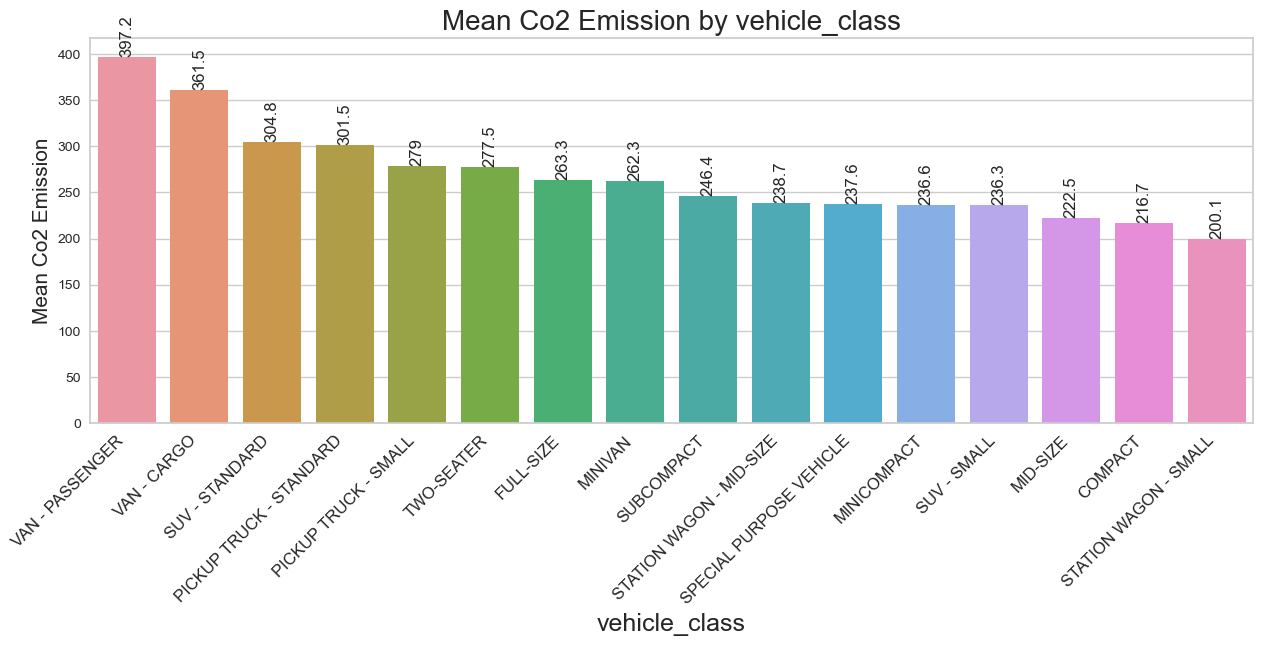

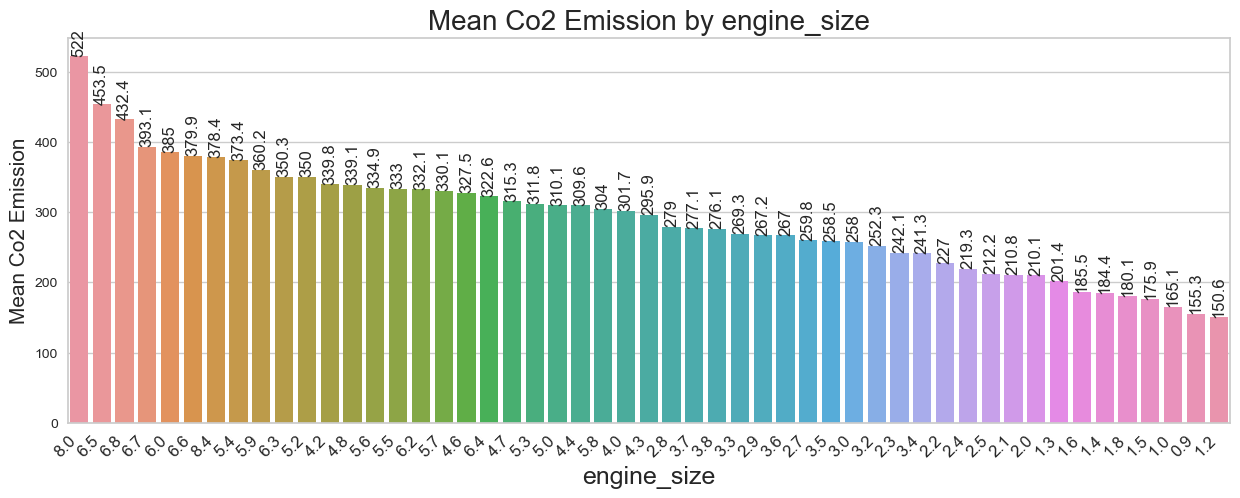

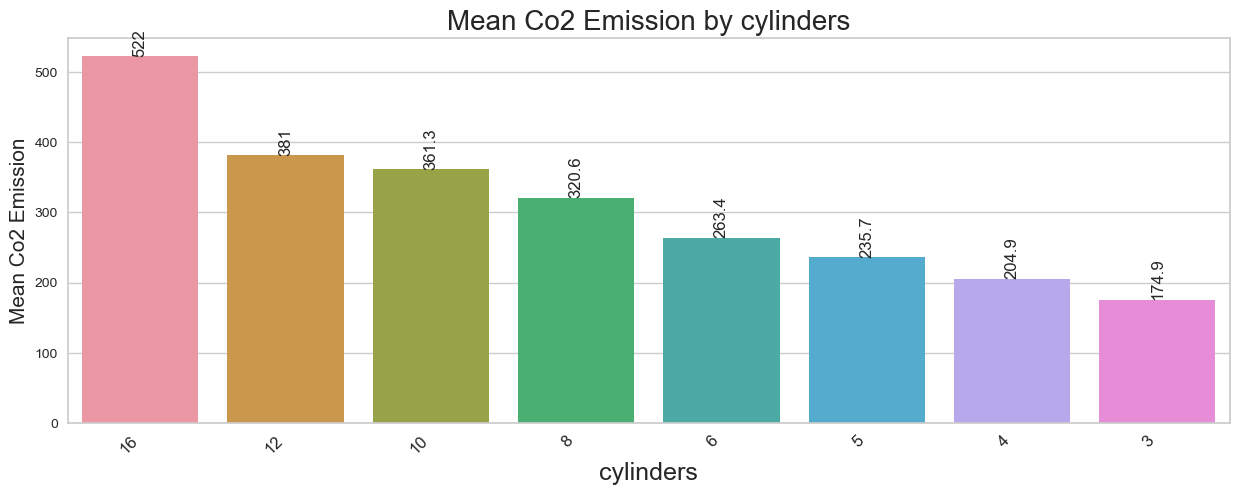

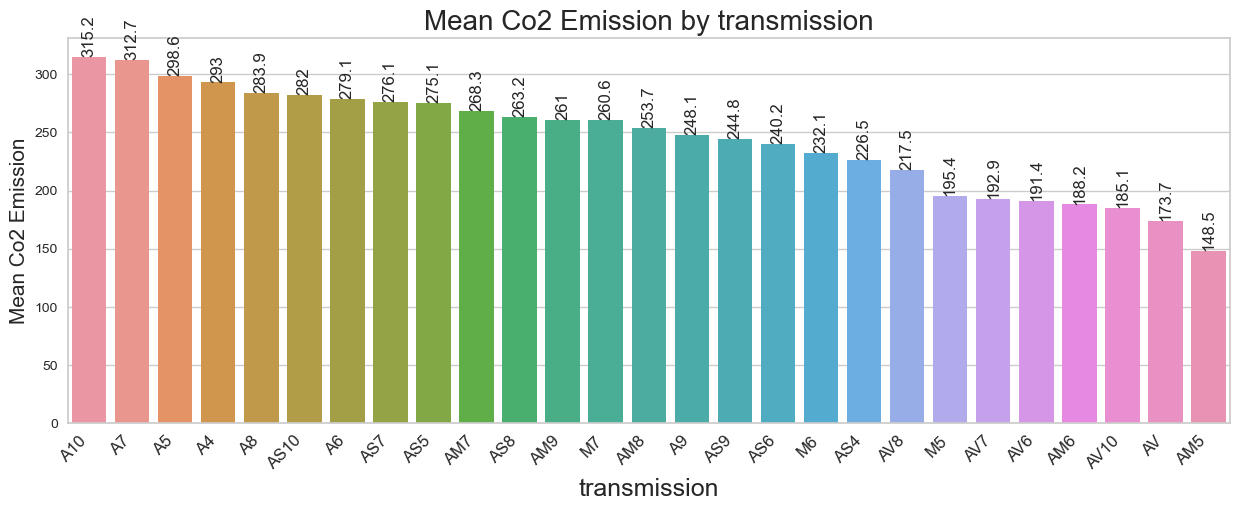

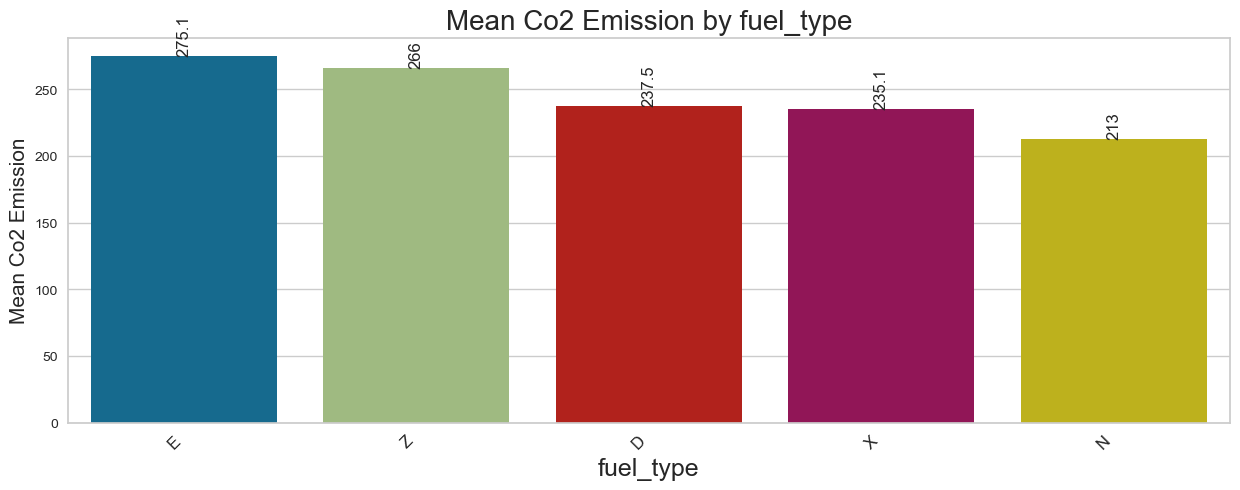

In [11]:
# Let's look at the relationship between our categorical attributes and the target variable

def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['co2'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='co2', ascending=False)
        ax = sns.barplot(x=column, y='co2', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Mean Co2 Emission', fontsize=15)
        plt.title(f'Mean Co2 Emission by {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()
        
plot_bar_with_co2(df, cat_features)

As can be seen from the graphs above:

* Bugatti has the highest average Co2 emissions
* Large-volume vehicles have high CO2 emission averages
* C02 emission averages of high volume and cylinders engines are also high
* Ethanol is the fuel with the highest average CO2

# Numerical Features

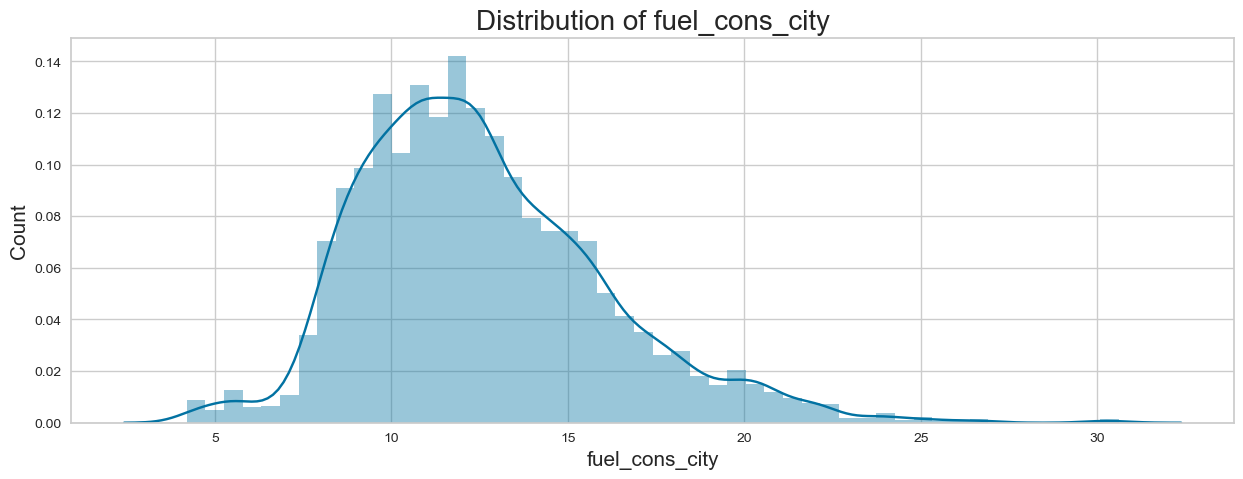

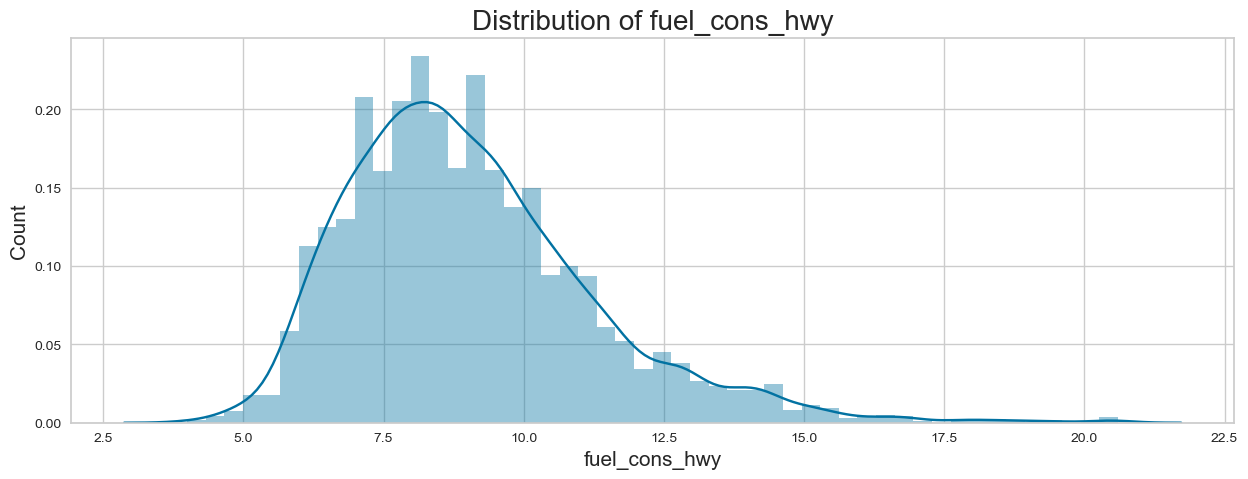

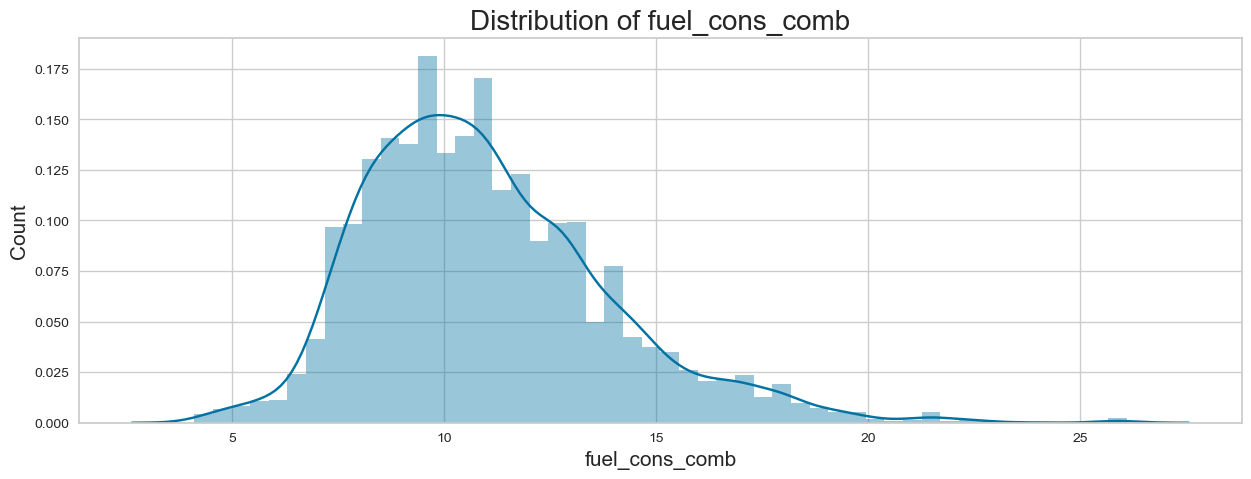

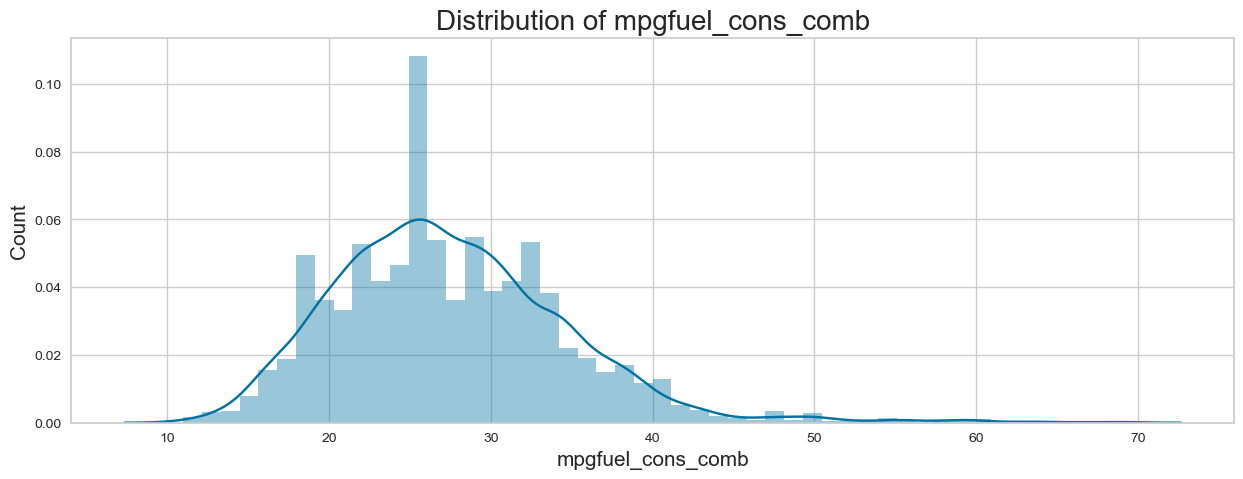

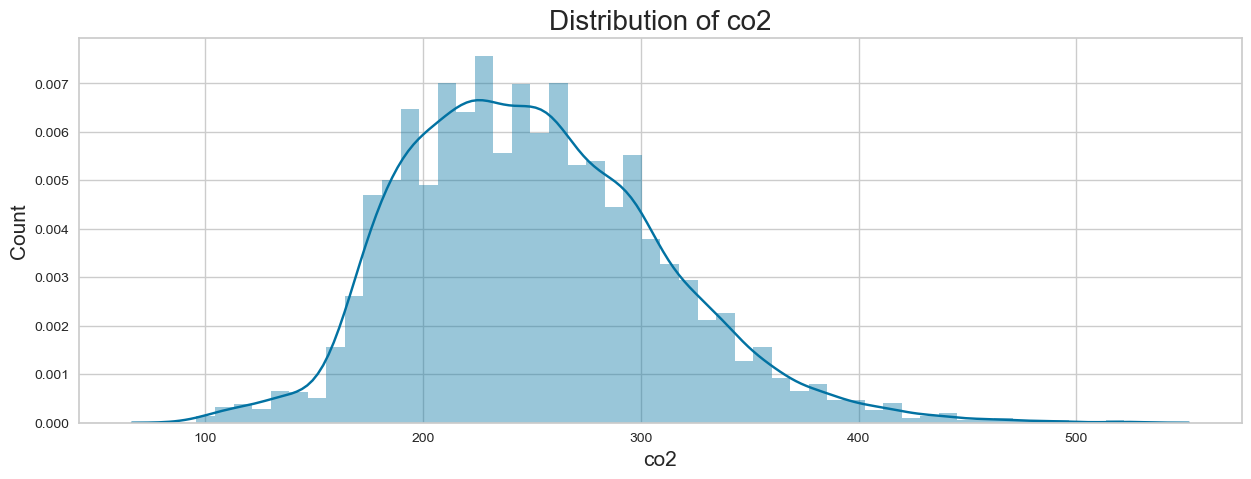

In [12]:
def numerical_dist(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        sns.distplot(x=df[column])
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Count', fontsize=15)
        plt.title(f'Distribution of {column}', fontsize=20)
        plt.show()
        
num_features = ['fuel_cons_city', 'fuel_cons_hwy','fuel_cons_comb', 'mpgfuel_cons_comb', 'co2']

numerical_dist(df, num_features)

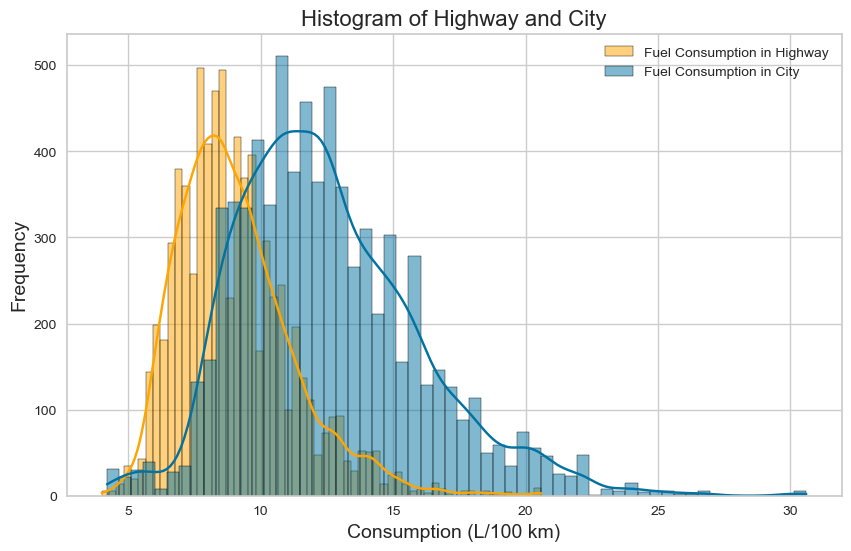

In [13]:
# Consumption of Highway and City

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="fuel_cons_hwy", kde=True, label = "Fuel Consumption in Highway",color = "orange")
sns.histplot(data=df, x="fuel_cons_city", kde=True, label = "Fuel Consumption in City")
plt.xlabel('Consumption (L/100 km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(f'Histogram of Highway and City', fontsize=16)
plt.legend()
plt.show()


* As can be seen from the graph, fuel consumption on highways is higher

# Outliers Check

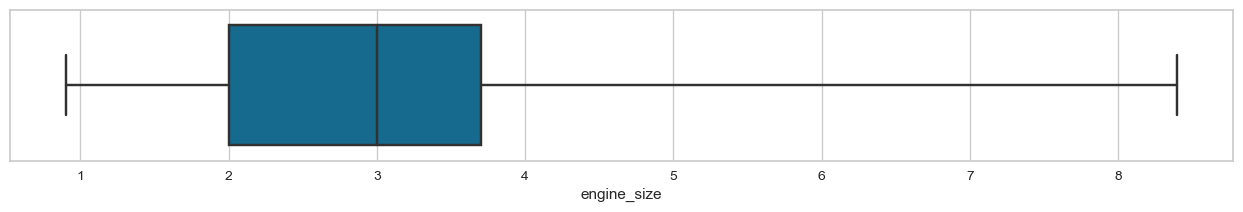

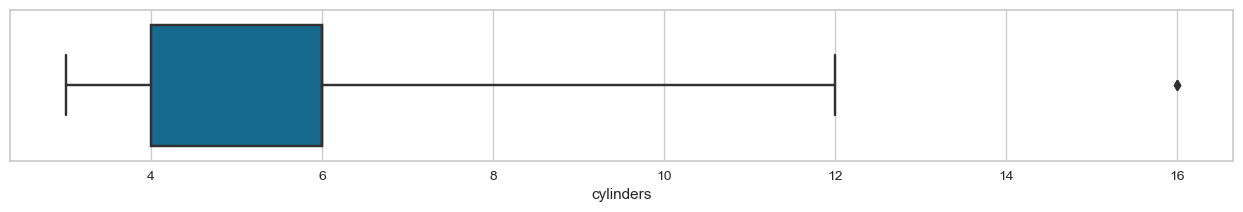

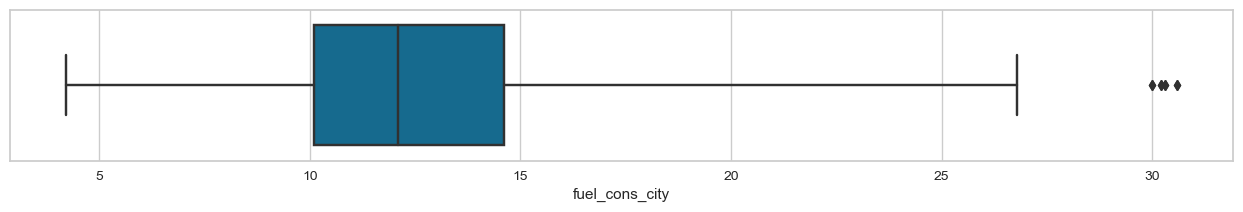

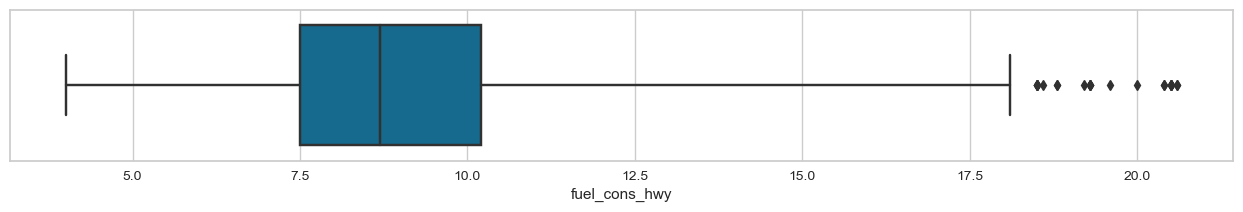

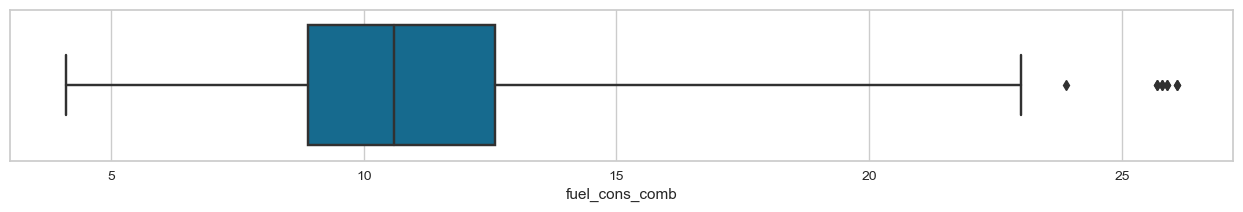

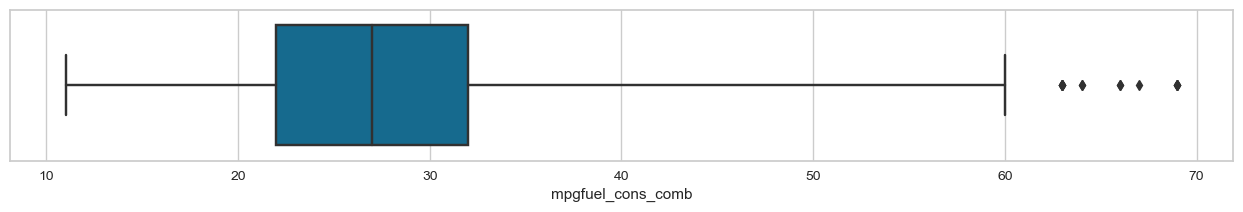

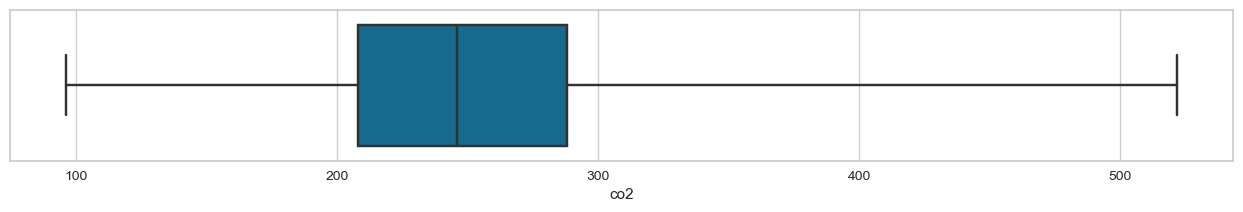

In [14]:
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(25,25))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df,whis=3) 
        
    plt.tight_layout()
    
    plt.show()

* We do not intervene with outliers at the moment, but we can take action later according to the model's forecasting performance.

# Correlation

In [15]:
# Let's color our correlation table 
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val < -0.90 and val > -1.00:
        color = "red"
    elif val == 1:
        color = "blue"
    elif val >= -0.30 and val <= 0:
        color = "green"
    elif val <= 0.30 and val > 0:
        color = "green"
    else:
        color = 'black'
    return f'color: {color}'

df.corr().style.applymap(color_red)

,engine_size,cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,mpgfuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
mpgfuel_cons_comb,-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
co2,0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


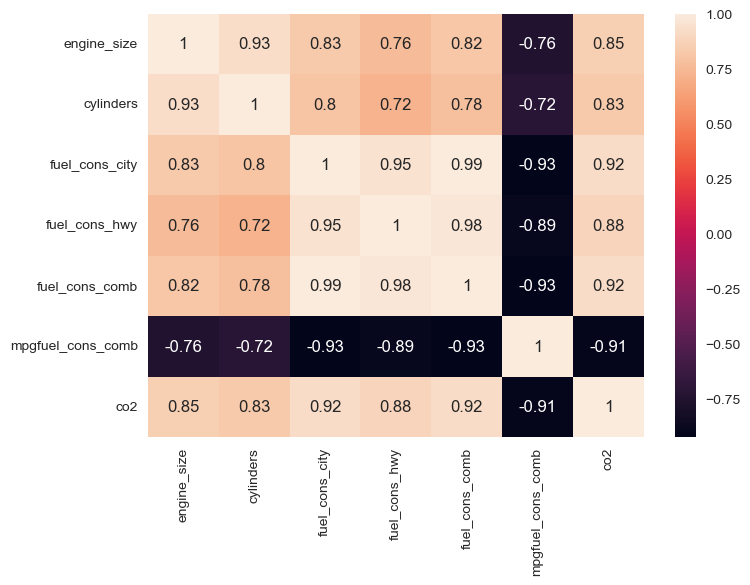

In [16]:
sns.heatmap(df.corr(), annot = True)
plt.show()

* Fuel Consumption Comb (mpg) is negatively correlated to all the features.
* All the other features are postively correlated with each other

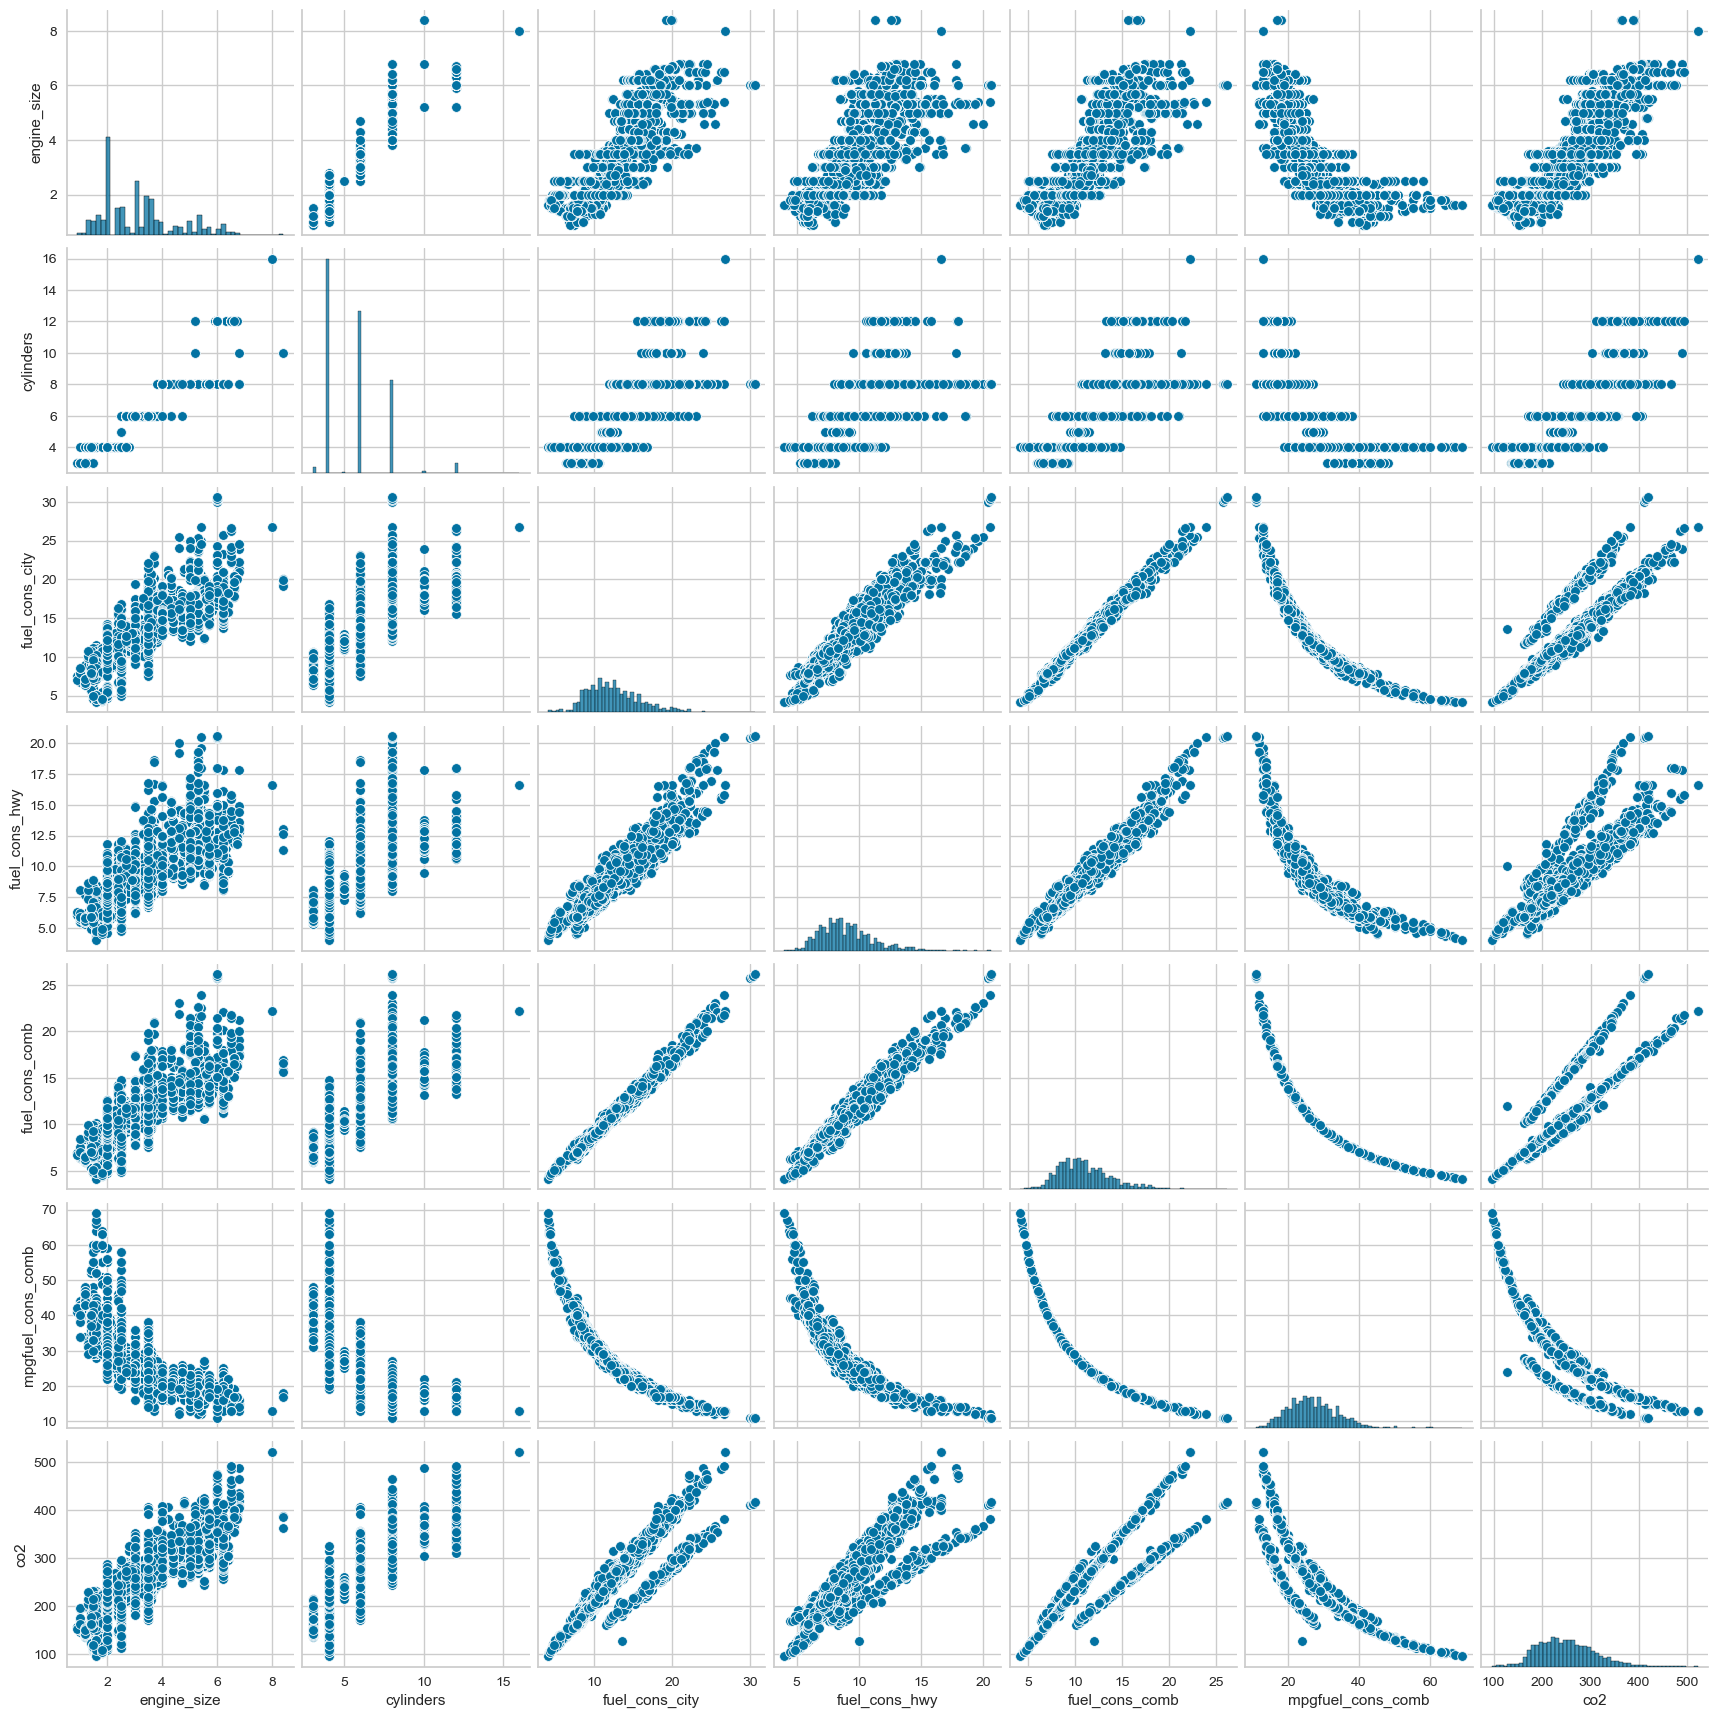

In [17]:
# We can look at our features more generally 
sns.pairplot(df)
plt.show()

* When we look at the distribution of our target variable with the other features, the linear relationship between them shows that our linear model will perform well.
* In fact, it is clear from the following table that I hope to get high predictions with only numeric columns without using any categorical columns
* For our model, we can choose the column fuel_cons_comb, which is the combination of city and highway in fuel consumption. The other two will cause multicollinearity. So we can choose the following numerical columns

-engine_size

-cylinders

-fuel_cons_comb

-mpgfuel_cons_comb

# Modelling

## Simple Lineer Regression

### Train-Test Split

In [18]:
X = df[["engine_size"]]
y = df["co2"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
for i in (X_train, X_test, y_train, y_test):
    print(i.shape)

(5908, 1)
(1477, 1)
(5908,)
(1477,)


### Manuel Lineer Regresyon

In [22]:
np.polyfit(X_train.engine_size, y_train, deg = 1)

array([ 36.70483532, 134.57376563])

In [23]:
# y = b1 * X + b0

In [24]:
b1, b0 = np.polyfit(X_train.engine_size, y_train, deg = 1)

In [25]:
print("b1        :", b1)
print("b0        :", b0)

b1        : 36.704835315985
b0        : 134.57376563227712


In [26]:
y_pred_test = b1 * X_test + b0
y_pred_test

,engine_size
6307,244.688272
5036,207.983436
1995,274.052140
4156,226.335854
6328,244.688272
...,...
1632,340.120843
4640,266.711173
4021,226.335854
660,226.335854


In [27]:
y_pred_train = b1 * X_train + b0
y_pred_train

,engine_size
1095,207.983436
3538,329.109393
2377,226.335854
3414,296.075041
880,259.370206
...,...
4931,207.983436
3264,200.642469
1653,318.097942
2607,263.040689


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [29]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")
    
print("Model testing performance: ")   
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764512
MAE 		: 23.025089125242282
MSE 		: 912.8346430153166
RMSE 		: 30.213153476843768


In [30]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.34703683009361
MSE 		: 950.9184766753834
RMSE 		: 30.83696607442735


### LinearRegression (scikit learn)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [33]:
lin_reg.coef_      # b1

array([36.70483532])

In [34]:
lin_reg.intercept_ # b0

134.5737656322779

In [35]:
y_pred_test = lin_reg.predict(X_test)
y_pred_test

array([244.68827158, 207.98343626, 274.05213983, ..., 226.33585392,
       226.33585392, 226.33585392])

In [36]:
y_pred_train = lin_reg.predict(X_train)
y_pred_train

array([207.98343626, 329.10939281, 226.33585392, ..., 318.09794221,
       263.04068924, 207.98343626])

In [37]:
print("Model testing performance: ")
eval_metric(y_test, y_pred_test)

Model testing performance: 
--------------------------
R2_score 	: 0.7335273048764516
MAE 		: 23.025089125242342
MSE 		: 912.8346430153156
RMSE 		: 30.21315347684375


In [38]:
print("Model training performance: ")
eval_metric(y_train, y_pred_train)

Model training performance: 
--------------------------
R2_score 	: 0.7221684836911433
MAE 		: 23.347036830093717
MSE 		: 950.9184766753833
RMSE 		: 30.836966074427348


In [39]:
# The difference between MAE and RMSE indicates outlier effect

In [40]:
my_dict = {"Actual": y_test, "pred": y_pred_test, "residual": y_test - y_pred_test}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
6307,241,244.688272,-3.688272
5036,229,207.983436,21.016564
1995,253,274.052140,-21.052140
4156,183,226.335854,-43.335854
6328,231,244.688272,-13.688272
1696,195,222.665370,-27.665370
4313,301,263.040689,37.959311
5685,277,266.711173,10.288827
4902,201,193.301502,7.698498
6873,280,233.676821,46.323179


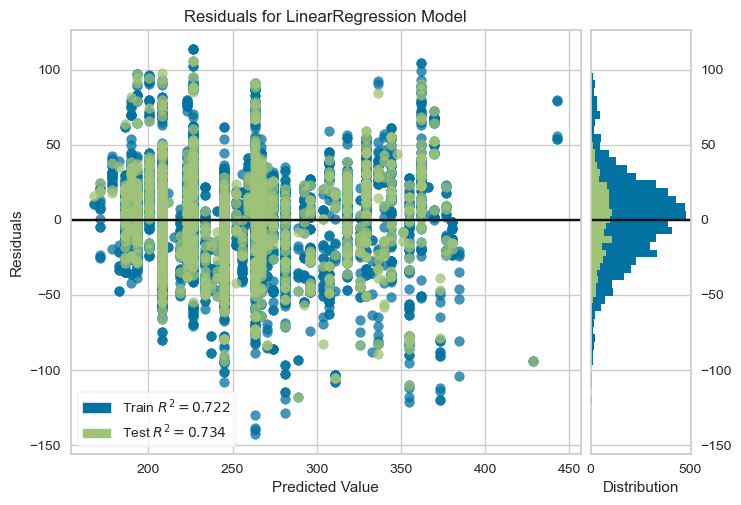

In [41]:
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

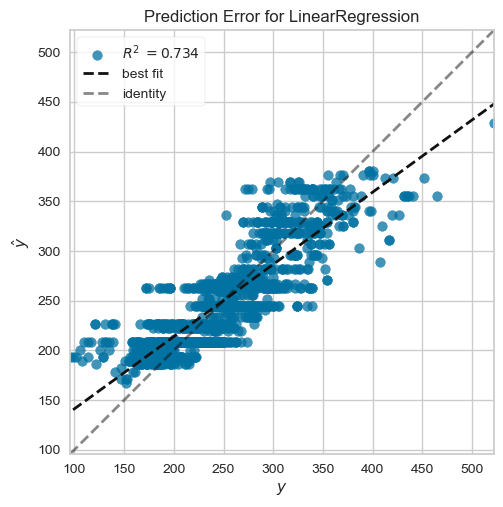

In [42]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Multiple Lineer Regression

### Train-Test Split

In [26]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_cons_city', 'fuel_cons_hwy',
       'fuel_cons_comb', 'mpgfuel_cons_comb', 'co2'],
      dtype='object')

In [27]:
X = df[["engine_size", "cylinders", "fuel_cons_comb", "mpgfuel_cons_comb"]]
y = df["co2"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape: {}\ny Test features shape: {}" 
      .format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape: (1477, 4)
y Test features shape: (1477,)


### Multiple Lineer Regresyon

In [30]:
multi_lin_reg = LinearRegression()

In [31]:
multi_lin_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = multi_lin_reg.predict(X_test)
y_train_pred = multi_lin_reg.predict(X_train)

In [33]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [34]:
multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "multi")
multiple_linear

,multi_train,multi_test
R2,0.903380,0.900396
mae,11.427166,11.676076
mse,330.301688,342.600757
rmse,18.174204,18.509478


* As can be seen, high R2 scores were obtained with only 4 features.  (excluding categorical features)

### Cross Validation

In [35]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error',
                                                            'neg_root_mean_squared_error'], cv = 10)

In [36]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.011994,0.010993,0.901253,-11.450945,-338.885163,-18.408834
2,0.009994,0.008993,0.906125,-10.771034,-282.138335,-16.796974
3,0.008993,0.007996,0.905516,-11.687907,-347.007425,-18.628135
4,0.009993,0.007996,0.897220,-11.223875,-314.019278,-17.720589
5,0.008994,0.009993,0.901426,-11.740706,-344.508635,-18.560944
6,0.008996,0.008995,0.883596,-12.016296,-377.492440,-19.429165
7,0.009994,0.008994,0.917169,-10.846386,-298.239263,-17.269605
8,0.009995,0.007996,0.907901,-11.270642,-324.186084,-18.005168
9,0.008994,0.008995,0.905299,-11.173030,-306.171520,-17.497758
10,0.008993,0.008996,0.902219,-12.174987,-380.017899,-19.494048


In [37]:
scores = pd.DataFrame(scores, index=range(1,11))
scores.iloc[:, 2:].mean()

test_r2                               0.902772
test_neg_mean_absolute_error        -11.435581
test_neg_mean_squared_error        -331.266604
test_neg_root_mean_squared_error    -18.181122
dtype: float64

* The fact that this score obtained after Cross Validation and Train-test score are compatible indicates that the model has generalization ability.

## Polynomial Features (degree = 5)

In [38]:
def poly(d):
    
    train_rmse_errors = []
    test_rmse_errors = []
    number_of_features = []
    
    for i in range(1, d):
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False) ## For döngüsü döndükçe degreemiz artıyor,
        poly_features = polynomial_converter.fit_transform(X)                        # bundan dolayı feature sayımız artıyor.
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True)
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, 
                         "number of features":number_of_features}, index=range(1,d))

In [39]:
poly(8)

,train_rmse_errors,test_rmse_errors,number of features
1,18.314047,18.087420,4
2,15.788285,15.680230,14
3,14.314294,13.914205,34
4,12.916365,12.699119,69
5,12.093932,12.490834,125
6,11.139236,13.458671,209
7,19.939600,116.936103,329


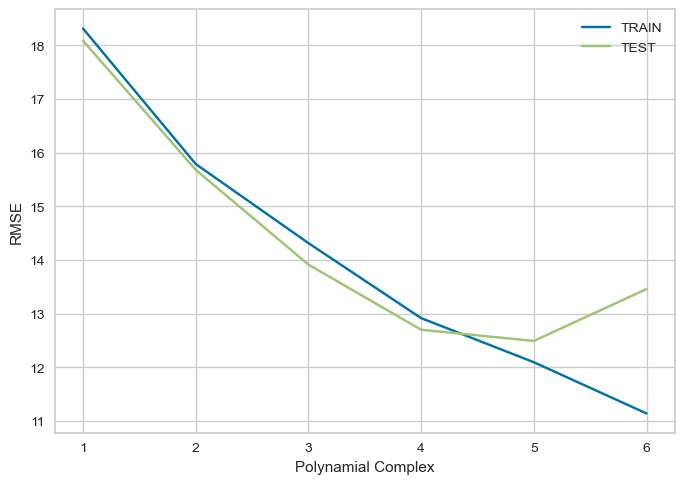

In [40]:
plt.plot(range(1,7), poly(7)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,7), poly(7)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [41]:
# we select degree 5
poly_converter = PolynomialFeatures(degree = 5, include_bias=False)

In [42]:
poly_lin_reg = LinearRegression()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [44]:
poly_lin_reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_train_pred = poly_lin_reg.predict(X_train)
y_pred = poly_lin_reg.predict(X_test)

In [46]:
poly_multiple_linear = train_val(y_train, y_train_pred, y_test, y_pred, "poly(5)")
poly_multiple_linear

,poly(5)_train,poly(5)_test
R2,0.959309,0.950289
mae,5.722299,6.247013
mse,139.103564,170.986517
rmse,11.794217,13.076181


In [47]:
result = pd.concat([multiple_linear, poly_multiple_linear], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test
R2,0.903380,0.900396,0.959309,0.950289
mae,11.427166,11.676076,5.722299,6.247013
mse,330.301688,342.600757,139.103564,170.986517
rmse,18.174204,18.509478,11.794217,13.076181


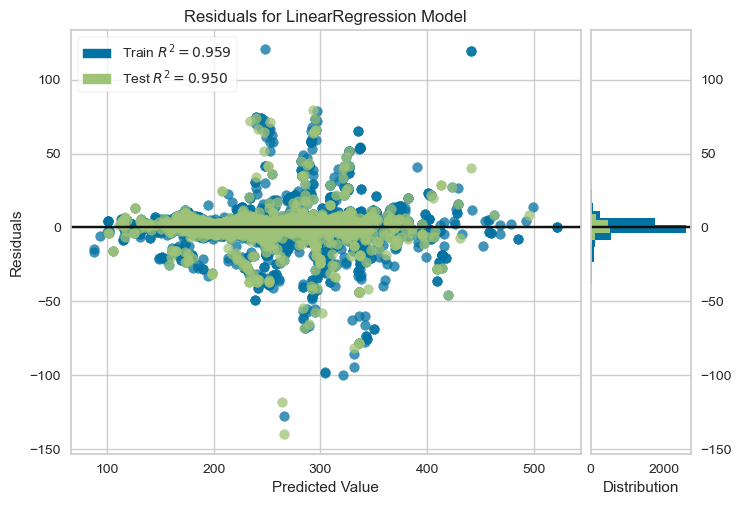

In [48]:
poly_lin_reg = LinearRegression()
visualizer = ResidualsPlot(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

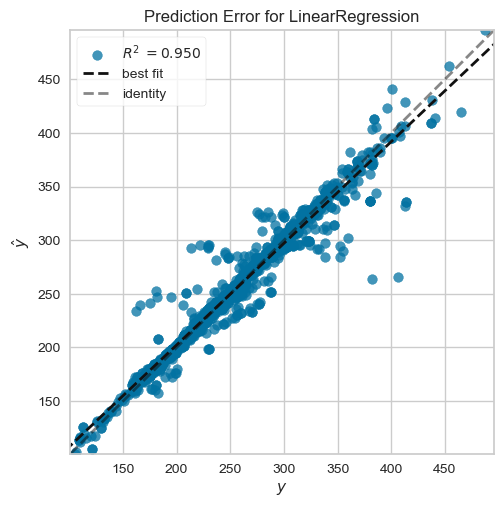

In [49]:
poly_lin_reg = LinearRegression()
visualizer = PredictionError(poly_lin_reg)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

## Polynomial Features (degree = 6)

In [50]:
# select degree 6 to see the regulation operations
poly_converter2 = PolynomialFeatures(degree = 6, include_bias=False)

In [51]:
poly_lin_reg2 = LinearRegression()

In [52]:
X_train, X_test, y_train, y_test = train_test_split(poly_converter2.fit_transform(X), y,
                                                    test_size = 0.2, random_state = 42)

In [53]:
poly_lin_reg2.fit(X_train, y_train)

LinearRegression()

In [54]:
y_train_pred = poly_lin_reg2.predict(X_train)
y_pred = poly_lin_reg2.predict(X_test)

In [55]:
poly_multiple_linear6 = train_val(y_train, y_train_pred, y_test, y_pred, "poly(6)")
poly_multiple_linear6

,poly(6)_train,poly(6)_test
R2,0.965875,0.818889
mae,5.357306,6.891835
mse,116.657362,622.953526
rmse,10.800804,24.959037


In [56]:
result = pd.concat([result, poly_multiple_linear6], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037


* We have created overfitting with degree 6 so we can use ridge, lasso and elastic net models. Before using these models we need to standardize 

### StandardScaler

In [57]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = StandardScaler()

In [58]:
X_train.shape

(5908, 209)

In [59]:
scaler.fit(X_train)

StandardScaler()

In [60]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled 

array([[-0.12149345,  0.20534188, -0.37681659, ...,  0.14217637,
        -0.0991014 , -0.1352883 ],
       [ 0.6141664 ,  0.20534188,  0.59257065, ..., -0.72488358,
        -0.45513823, -0.23456056],
       [-0.12149345,  0.20534188,  0.24636092, ..., -0.51501106,
        -0.38343999, -0.21853428],
       ...,
       [ 0.24633648,  0.20534188, -0.20371173, ..., -0.18333964,
        -0.23838043, -0.17805417],
       [-0.48932338, -0.88513888, -0.82688924, ...,  0.64777588,
         0.24631392,  0.00835783],
       [ 0.6141664 ,  1.29582264,  0.31560287, ..., -0.47195747,
        -0.37931965, -0.21853428]])

In [61]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled 

array([[-0.12149345,  0.20534188, -0.03060686, ..., -0.27096924,
        -0.28940628, -0.19424162],
       [ 0.90843035,  1.29582264,  1.2849901 , ..., -0.98942374,
        -0.53030578, -0.24823844],
       [ 2.23261809,  1.29582264,  1.04264329, ..., -0.90147536,
        -0.50856895, -0.24474255],
       ...,
       [-1.29854922, -0.88513888, -1.10385702, ...,  1.0457956 ,
         0.59578558,  0.19090711],
       [ 0.24633648,  0.20534188, -0.27295367, ..., -0.00551064,
        -0.17029007, -0.15857477],
       [-0.85715331, -0.88513888, -0.96537313, ...,  0.70673508,
         0.3394726 ,  0.06059508]])

## Ridge Regression

In [62]:
from sklearn.linear_model import Ridge

In [63]:
ridge_model = Ridge(alpha=1, random_state=42)

In [64]:
ridge_model.fit(X_train_scaled, y_train) 

Ridge(alpha=1, random_state=42)

In [65]:
y_pred = ridge_model.predict(X_test_scaled)        
y_train_pred = ridge_model.predict(X_train_scaled)

In [66]:
ridge = train_val(y_train, y_train_pred, y_test, y_pred, "ridge") 
ridge

,ridge_train,ridge_test
R2,0.941473,0.933323
mae,7.168497,7.869761
mse,200.076109,229.345723
rmse,14.144826,15.144165


In [67]:
ridge_model.coef_

array([ 19.16015139,  11.06747963,   7.50456411, -18.11146055,
        11.53195208,  -9.14549672,   9.60556252,  -1.13817654,
        13.93391642,  13.14313643, -20.75444883, -19.13219729,
        -2.39160782,   3.87493922,   3.70803215,  -9.74583521,
        11.62142566,   2.55364796,  -8.35230262, -11.74239878,
       -17.02529496, -10.90688989,  22.39298142, -10.36736071,
        10.43453388,  16.53674907,  -1.07089008,   0.64225192,
        15.71846913,  -5.75174089, -24.86787439,   7.76606617,
       -16.51020982,  11.50289719,  -4.32801833,  -4.15130397,
        16.17195659,  -3.1439619 ,  -5.36953755,  -9.26134778,
       -10.59292447,   8.59733984,  12.3641765 , -11.43206276,
        -2.43054869, -11.11479548, -10.37615076, -18.39970644,
        -7.57344974, -19.79149874, -21.84699152,  11.03599675,
         3.51130938,   7.23449024,   4.41824034,  12.89760069,
        -1.55743557,  11.52764056,  15.8177602 ,  -5.41849598,
        -1.96544196,  16.31175135, -13.58175266,   6.93

In [68]:
result = pd.concat([result, ridge], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165


### RidgeCV

In [69]:
# Find the best alpha value with RidgeCV

alpha_space = np.linspace(0.01, 1, 100)
ridge_cv_model = RidgeCV(alphas = alpha_space, cv = 10, scoring = "neg_root_mean_squared_error")
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, scoring='neg_root_mean_squared_error')

In [71]:
ridge_cv_model.alpha_          # Best alpha value

0.05

In [72]:
y_pred = ridge_cv_model.predict(X_test)
y_train_pred = ridge_cv_model.predict(X_train)

In [73]:
ridge_cv = train_val(y_train, y_train_pred, y_test, y_pred, "ridgeCV")
ridge_cv

,ridgeCV_train,ridgeCV_test
R2,0.962880,0.939512
mae,5.458245,6.144350
mse,126.896843,208.057079
rmse,11.264850,14.424184


In [74]:
ridge_cv_model.coef_            # Coefficients of insignificant variables approach zero

array([ 1.38636746e-01,  7.36480102e-02,  1.89121109e+00, -1.59432706e+00,
        1.53540058e-01, -3.63973171e-01, -9.76647540e-01,  6.94249981e+00,
       -5.89347792e-01,  3.32964218e+00, -2.18864456e+00,  2.22883046e+01,
        1.19577020e+00, -1.82601721e+01,  8.26042721e+00,  1.33084969e+00,
       -6.39239599e-01,  1.05332186e+01, -3.33597635e+00, -9.19538298e+00,
        5.84599884e+00, -9.59074861e+00, -7.30704914e+00,  1.18076326e+02,
       -2.33981094e-01, -2.69740206e+00, -5.03072979e+00,  2.45195950e+01,
       -3.67522665e+00, -3.04607739e+01,  4.87635118e+01,  9.02890256e+01,
        1.03260289e+01,  7.19959465e-01,  3.20018737e+01,  2.30001145e+01,
        3.65596657e+01,  7.46303039e+01,  1.99269759e+01, -5.49403940e+00,
        1.38435514e+01,  5.32872397e+01, -1.77628660e+01,  8.64422113e+00,
        1.65299560e+00, -3.18222619e+01, -1.47331828e+01, -9.85248435e+01,
        1.10718924e+01, -6.87233744e+00, -8.07943429e+00, -1.87086163e+01,
       -2.75837460e+01, -

In [75]:
result = pd.concat([result, ridge_cv], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323,0.962880,0.939512
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761,5.458245,6.144350
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723,126.896843,208.057079
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165,11.264850,14.424184


## Lasso Regression

In [76]:
lasso_model = Lasso(alpha = 1, random_state = 42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [77]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [78]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.910909,0.905296
mae,11.048065,11.404326
mse,304.561235,325.745246
rmse,17.451683,18.048414


In [79]:
lasso_model.coef_             # As it is seen, the features with low importance are zero.

array([  0.        ,   0.        ,   0.        , -34.35301026,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  13.81471249,  -0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   2.29186039,  -0.        ,
         0.        ,   0.66912106,   0.        ,   0.        ,
         0.        ,  -0.        ,  -0.        ,   0.        ,
        -0.        ,  -0.        ,   0.        ,   0.        ,
         2.49140929,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,  -0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,  -0.        ,
         0.        ,   0.40846133,  -0.        ,  -0.  

In [80]:
nonzero_features = np.count_nonzero(lasso_model.coef_)         # non-zero coefficients  
nonzero_features

13

In [81]:
result = pd.concat([result, lss], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323,0.962880,0.939512,0.910909,0.905296
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761,5.458245,6.144350,11.048065,11.404326
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723,126.896843,208.057079,304.561235,325.745246
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165,11.264850,14.424184,17.451683,18.048414


### LassoCV

In [82]:
# Find the best alpha value with RidgeCV

lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=1000000, random_state=42)
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=10, max_iter=1000000, random_state=42)

In [83]:
lasso_cv_model.alpha_             # Best alpha value

0.01

In [85]:
y_pred = lasso_cv_model.predict(X_test_scaled)           # Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [86]:
lasso_cv = train_val(y_train, y_train_pred, y_test, y_pred, "lassoCV")
lasso_cv

,lassoCV_train,lassoCV_test
R2,0.938429,0.929081
mae,7.429202,8.197321
mse,210.484371,243.933921
rmse,14.508080,15.618384


* R2 score increased with coefficient increase 

In [102]:
lasso_cv_model.coef_ 

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.57806180e+01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.22699119e+01, -1.94996655e+01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  1.83942700e+01, -0.00000000e+00,
        0.00000000e+00,  1.46352381e+01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -5.79531842e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -3.39645889e+01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [87]:
nonzero_features = np.count_nonzero(lasso_cv_model.coef_)         # non-zero coefficients  
nonzero_features

28

In [104]:
result = pd.concat([result, lasso_cv], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323,0.962880,0.939512,0.910909,0.905296,0.938429,0.929081
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761,5.458245,6.144350,11.048065,11.404326,7.429202,8.197321
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723,126.896843,208.057079,304.561235,325.745246,210.484371,243.933921
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165,11.264850,14.424184,17.451683,18.048414,14.508080,15.618384


## ElasticNet Regression

In [105]:
elastic_model = ElasticNet(alpha = 1, l1_ratio = 0.5, random_state = 42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

In [106]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [107]:
elastic = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
elastic

,elastic_train,elastic_test
R2,0.905443,0.900398
mae,12.124323,12.444614
mse,323.249322,342.594176
rmse,17.979136,18.509300


In [108]:
result = pd.concat([result, elastic], axis=1)
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test,elastic_train,elastic_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323,0.962880,0.939512,0.910909,0.905296,0.938429,0.929081,0.905443,0.900398
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761,5.458245,6.144350,11.048065,11.404326,7.429202,8.197321,12.124323,12.444614
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723,126.896843,208.057079,304.561235,325.745246,210.484371,243.933921,323.249322,342.594176
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165,11.264850,14.424184,17.451683,18.048414,14.508080,15.618384,17.979136,18.509300


### ElasticNET CV

In [109]:
# Find the best alpha and l1_ratio values

elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 10, 
                                max_iter = 1000000,random_state=42)

In [110]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=10, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=1000000,
             random_state=42)

In [111]:
elastic_cv_model.alpha_          # Best alpha value

0.01

In [112]:
elastic_cv_model.l1_ratio_       # Best l1_ratio value (l1_ratio : ridge as it approaches 0, lasso as it approaches 1)

1.0

In [113]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [114]:
elastic_cv = train_val(y_train, y_train_pred, y_test, y_pred, "elasticCV")
elastic_cv

,elasticCV_train,elasticCV_test
R2,0.938429,0.929081
mae,7.429202,8.197321
mse,210.484371,243.933921
rmse,14.508080,15.618384


In [117]:
nonzero_features = np.count_nonzero(elastic_cv_model.coef_)         # non-zero coefficients  
nonzero_features                                                    # same coefficient as lassoCV (28)

28

In [115]:
result = pd.concat([result, elastic_cv], axis=1)   
result

,multi_train,multi_test,poly(5)_train,poly(5)_test,poly(6)_train,poly(6)_test,ridge_train,ridge_test,ridgeCV_train,ridgeCV_test,lasso_train,lasso_test,lassoCV_train,lassoCV_test,elastic_train,elastic_test,elasticCV_train,elasticCV_test
R2,0.903380,0.900396,0.959309,0.950289,0.965875,0.818889,0.941473,0.933323,0.962880,0.939512,0.910909,0.905296,0.938429,0.929081,0.905443,0.900398,0.938429,0.929081
mae,11.427166,11.676076,5.722299,6.247013,5.357306,6.891835,7.168497,7.869761,5.458245,6.144350,11.048065,11.404326,7.429202,8.197321,12.124323,12.444614,7.429202,8.197321
mse,330.301688,342.600757,139.103564,170.986517,116.657362,622.953526,200.076109,229.345723,126.896843,208.057079,304.561235,325.745246,210.484371,243.933921,323.249322,342.594176,210.484371,243.933921
rmse,18.174204,18.509478,11.794217,13.076181,10.800804,24.959037,14.144826,15.144165,11.264850,14.424184,17.451683,18.048414,14.508080,15.618384,17.979136,18.509300,14.508080,15.618384


In [116]:
result.T

,R2,mae,mse,rmse
multi_train,0.903380,11.427166,330.301688,18.174204
multi_test,0.900396,11.676076,342.600757,18.509478
poly(5)_train,0.959309,5.722299,139.103564,11.794217
poly(5)_test,0.950289,6.247013,170.986517,13.076181
poly(6)_train,0.965875,5.357306,116.657362,10.800804
poly(6)_test,0.818889,6.891835,622.953526,24.959037
ridge_train,0.941473,7.168497,200.076109,14.144826
ridge_test,0.933323,7.869761,229.345723,15.144165
ridgeCV_train,0.962880,5.458245,126.896843,11.264850
ridgeCV_test,0.939512,6.144350,208.057079,14.424184


* lassoCV and elasticCV have the same R2 scores  (because elasticCV l1_ratio parameter is 1)

## Grid Search

* l1 = LASSO

* l2 = RIDGE

* l1 = 05 = lasso + ridge

* Let's do with GridSearch what we did with elasticCV

In [119]:
elastic_model = ElasticNet(max_iter=100000, random_state=42)

In [120]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [121]:
grid_model = GridSearchCV(estimator = elastic_model, 
                          param_grid = param_grid, 
                          scoring = 'neg_root_mean_squared_error',
                          cv =5, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time= 8.0min
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=10.6min
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=23.1min
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time= 6.6min
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time= 6.6min
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time= 6.0min
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time= 6.0min
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time= 5.7min
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time= 6.6min
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time= 6.5min
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time= 7.5min
[CV] END ...........................alpha=0.01,

In [ ]:
# I interrupted GridSearch because it takes too much time 

In [114]:
grid_model.best_params_ 

{'alpha': 0.01, 'l1_ratio': 1}

In [ ]:
grid_model.best_index_                # Let's access the index number of the best candidate

In [ ]:
grid_model.best_score_

### Using Best Hyper Parameters From GridSearch

In [118]:
y_pred = grid_model.predict(X_test_scaled)          # ElasticNet(alpha= 0.01, l1_ratio= 1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
gridsearch = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gridsearch

In [ ]:
result = pd.concat([result, gridsearch], axis=1)   
result

## Final Model

In [14]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_converter2.fit_transform(X))

In [15]:
final_model = Lasso(alpha=0.01)      # Lasso model built over 28 features with our best alpha value 

In [16]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

* Continuing with polynomial features degree 6, the best score (test = 0.9290) is LassoCV with 28 features (alpha= 0.01)

* Continuing with polynomial features degree 5, the best score (test = 0.9502) is Multiple Linear Regression with 125 features.

## Feature importances with Ridge

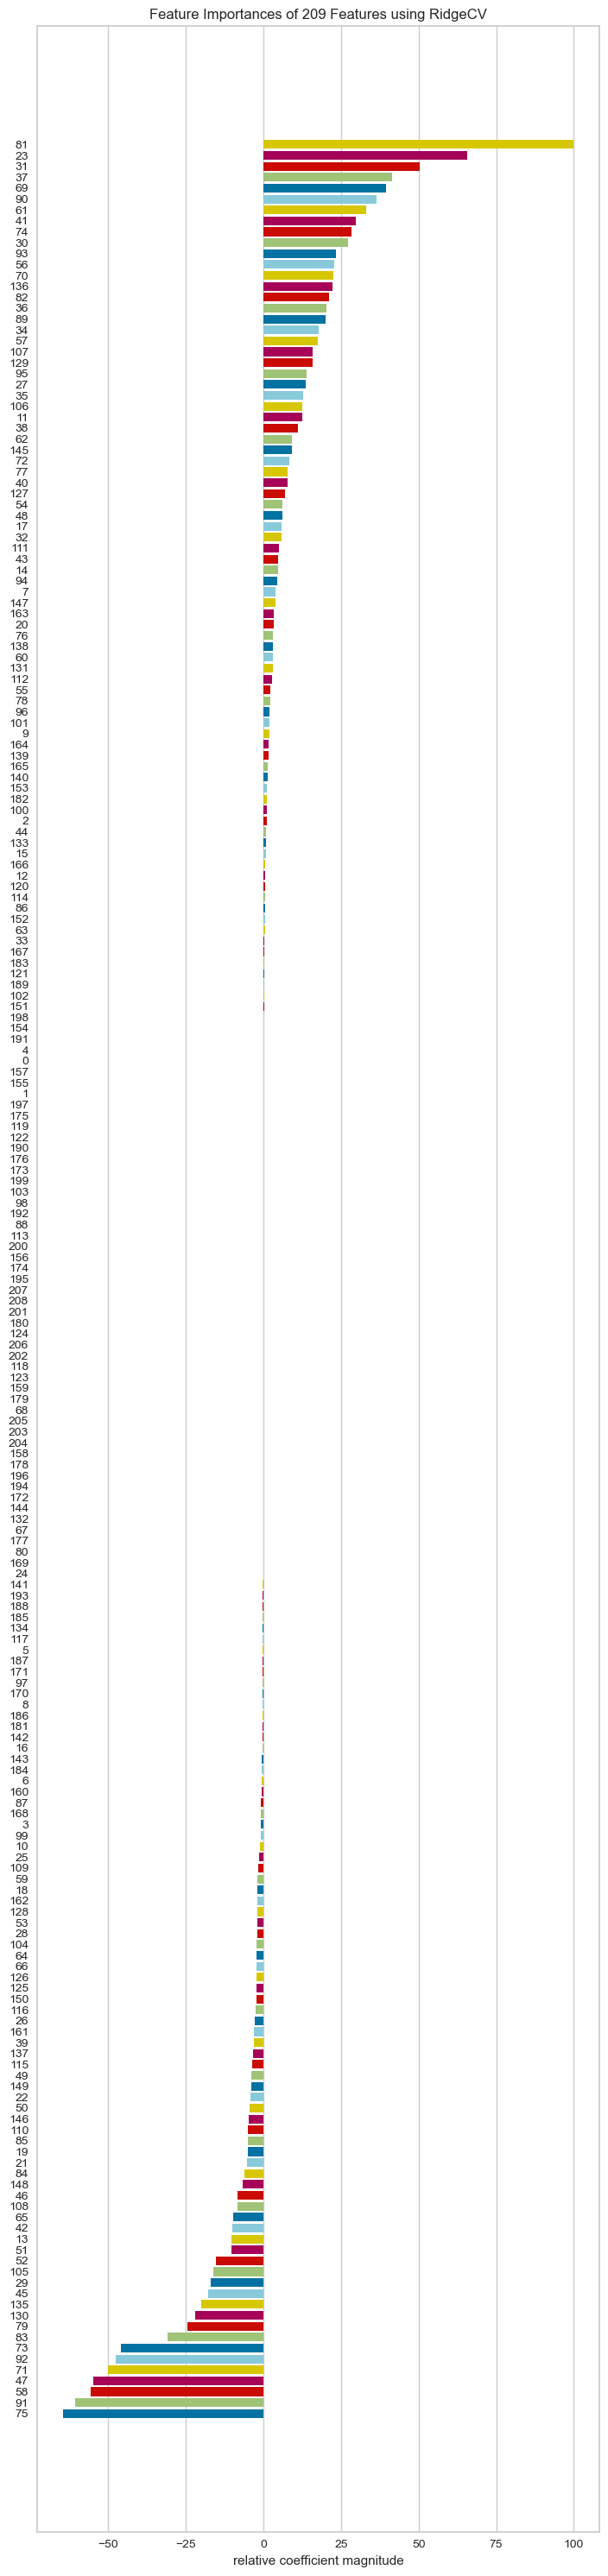

<AxesSubplot:title={'center':'Feature Importances of 209 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [88]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz  ## figsize gibi işlem yapıyor

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()

## Feature importances with Lasso

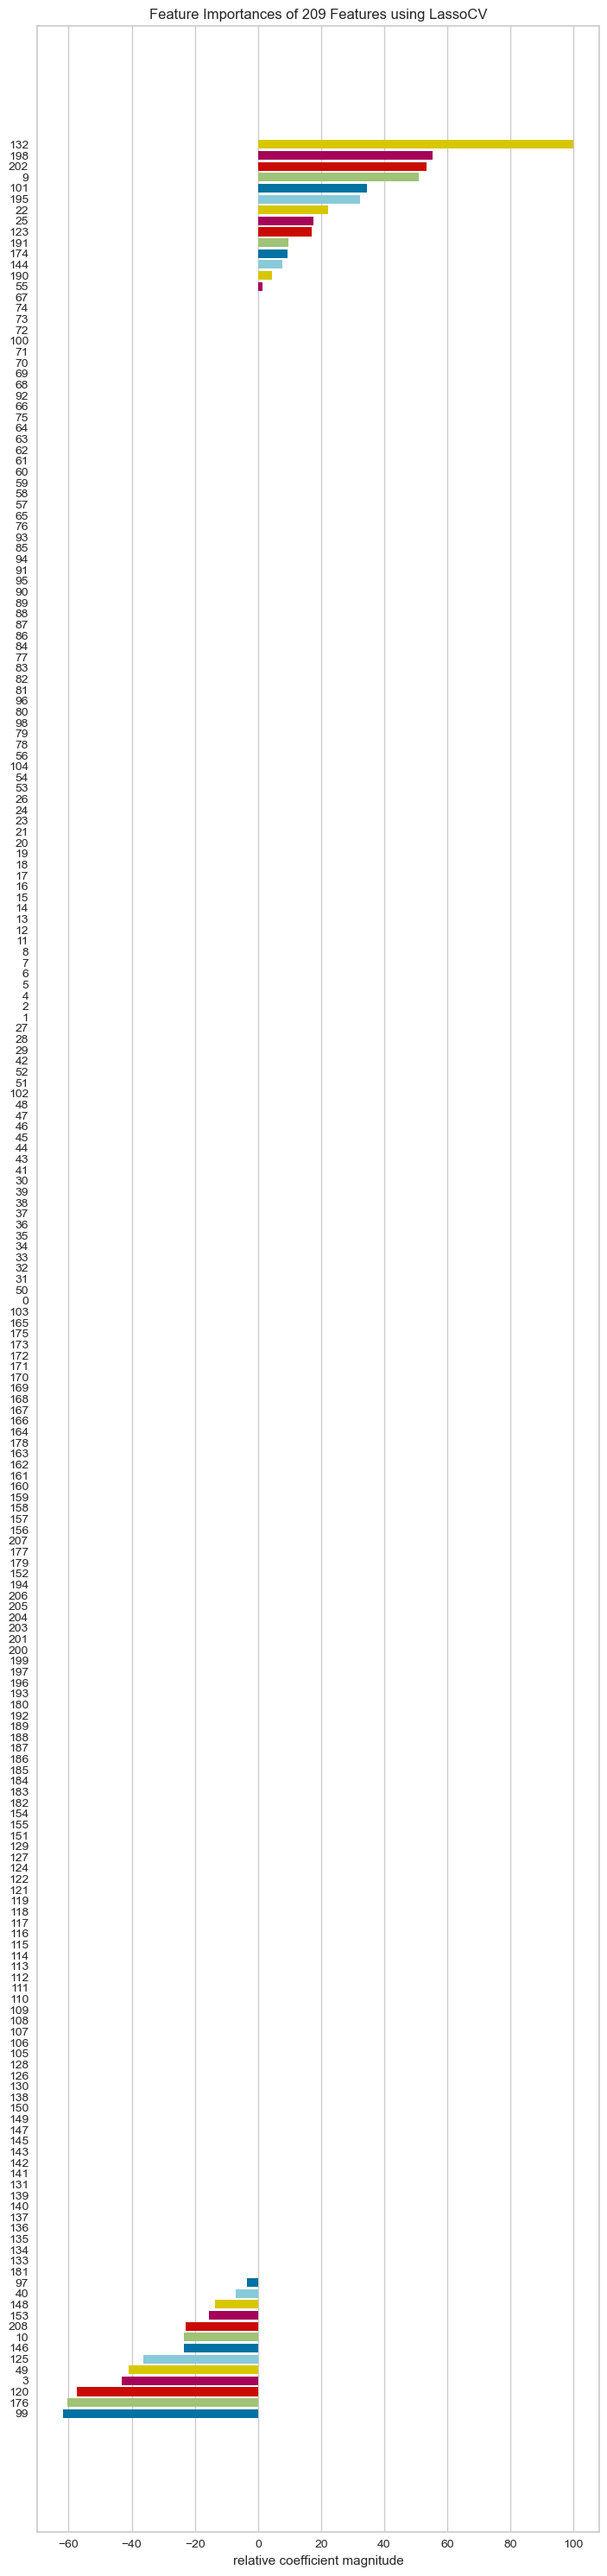

<AxesSubplot:title={'center':'Feature Importances of 209 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [91]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train_scaled).columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show()